In [74]:
from diffusers.utils import load_image
from PIL import Image
import numpy as np 


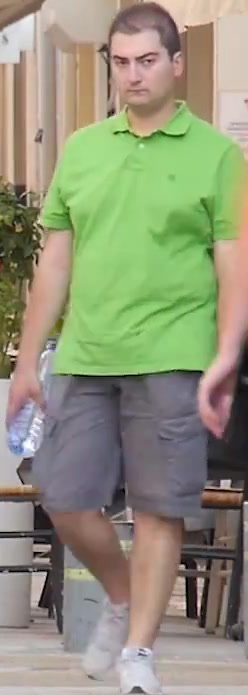

In [75]:
image_path = "/raid/home/vibhu20150/Datasets/IIITD-20K/IIITD-20K/IMAGE0008.jpg"
image = Image.open(image_path)
image

In [76]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# openpose_image = load_image(
#     "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
# )
openpose_image = image
openpose_image = openpose(openpose_image).resize((248, 695))


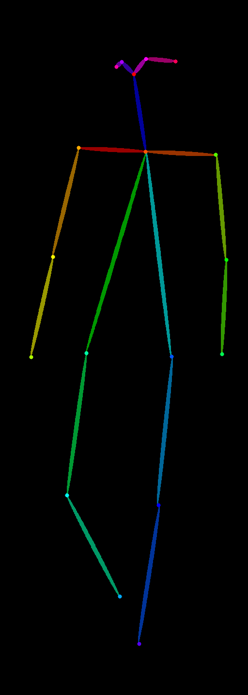

In [77]:
openpose_image.show()

In [78]:
from diffusers import  ControlNetModel, UniPCMultistepScheduler
from diffusers import StableDiffusionControlNetImg2ImgPipeline
import torch


In [79]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float16
)
model_id = "runwayml/stable-diffusion-v1-5"


In [80]:
pipe_I2I = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    model_id, controlnet=controlnet, torch_dtype=torch.float16, safety_checker=None
)


Loading pipeline components...: 100%|██████████| 6/6 [00:21<00:00,  3.53s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [81]:
pipe_I2I.scheduler = UniPCMultistepScheduler.from_config(pipe_I2I.scheduler.config)
pipe_I2I.enable_model_cpu_offload()


In [111]:
negative_prompts =[ "cartoonish, unrealistic, bad anatomy, worst quality, low quality"]

In [112]:
generator = torch.manual_seed(0)

In [113]:
images = pipe_I2I(prompt=prompt * 4, negative_prompt=negative_prompts * 4, control_image=openpose_image, image=image ,generator=generator, height=695, width=248)



100%|██████████| 40/40 [00:09<00:00,  4.04it/s]


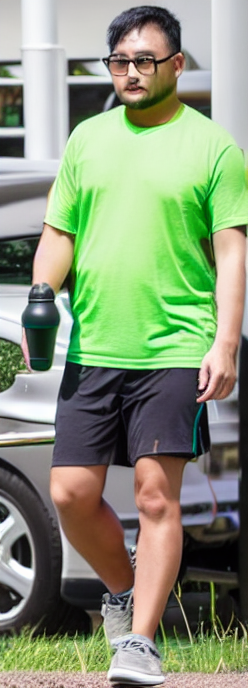

In [114]:
images.images[0].show()

In [115]:
image.size

(248, 695)